___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df= pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={'Annual Income (k$)': 'Income',
                   'Spending Score (1-100)': 'Score'},
                   inplace=True)
# This will make it easier for you to refer to these columns in your code.

In [4]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.describe(include="object").T

,count,unique,top,freq
Gender,200,2,Female,112


In [10]:
df.drop(columns="CustomerID", inplace=True)
# CustomerID is like index for us, so we drop it.

In [11]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [12]:
@interact(col=df.columns[1:], chart=["countplot", "histogram"])
def plot(col, chart):
    colors = np.random.choice(['blue', 'red', 'green'])
    if chart == "countplot":
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    else:
        plt.figure(figsize=(20, 5))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

#### Explore Data

#We will investigate the following aspects of the customer groups:

#1. Age Range: We will analyze the distribution and characteristics of customers based on their age.


#2. Annual Revenues: We will examine the annual income of the customers and understand its distribution among different groups.

#3. Spending Scores: We will explore the spending scores of the customers and analyze their behavior and preferences.

interactive(children=(Dropdown(description='col', options=('Age', 'Income', 'Score'), value='Age'), Dropdown(d…

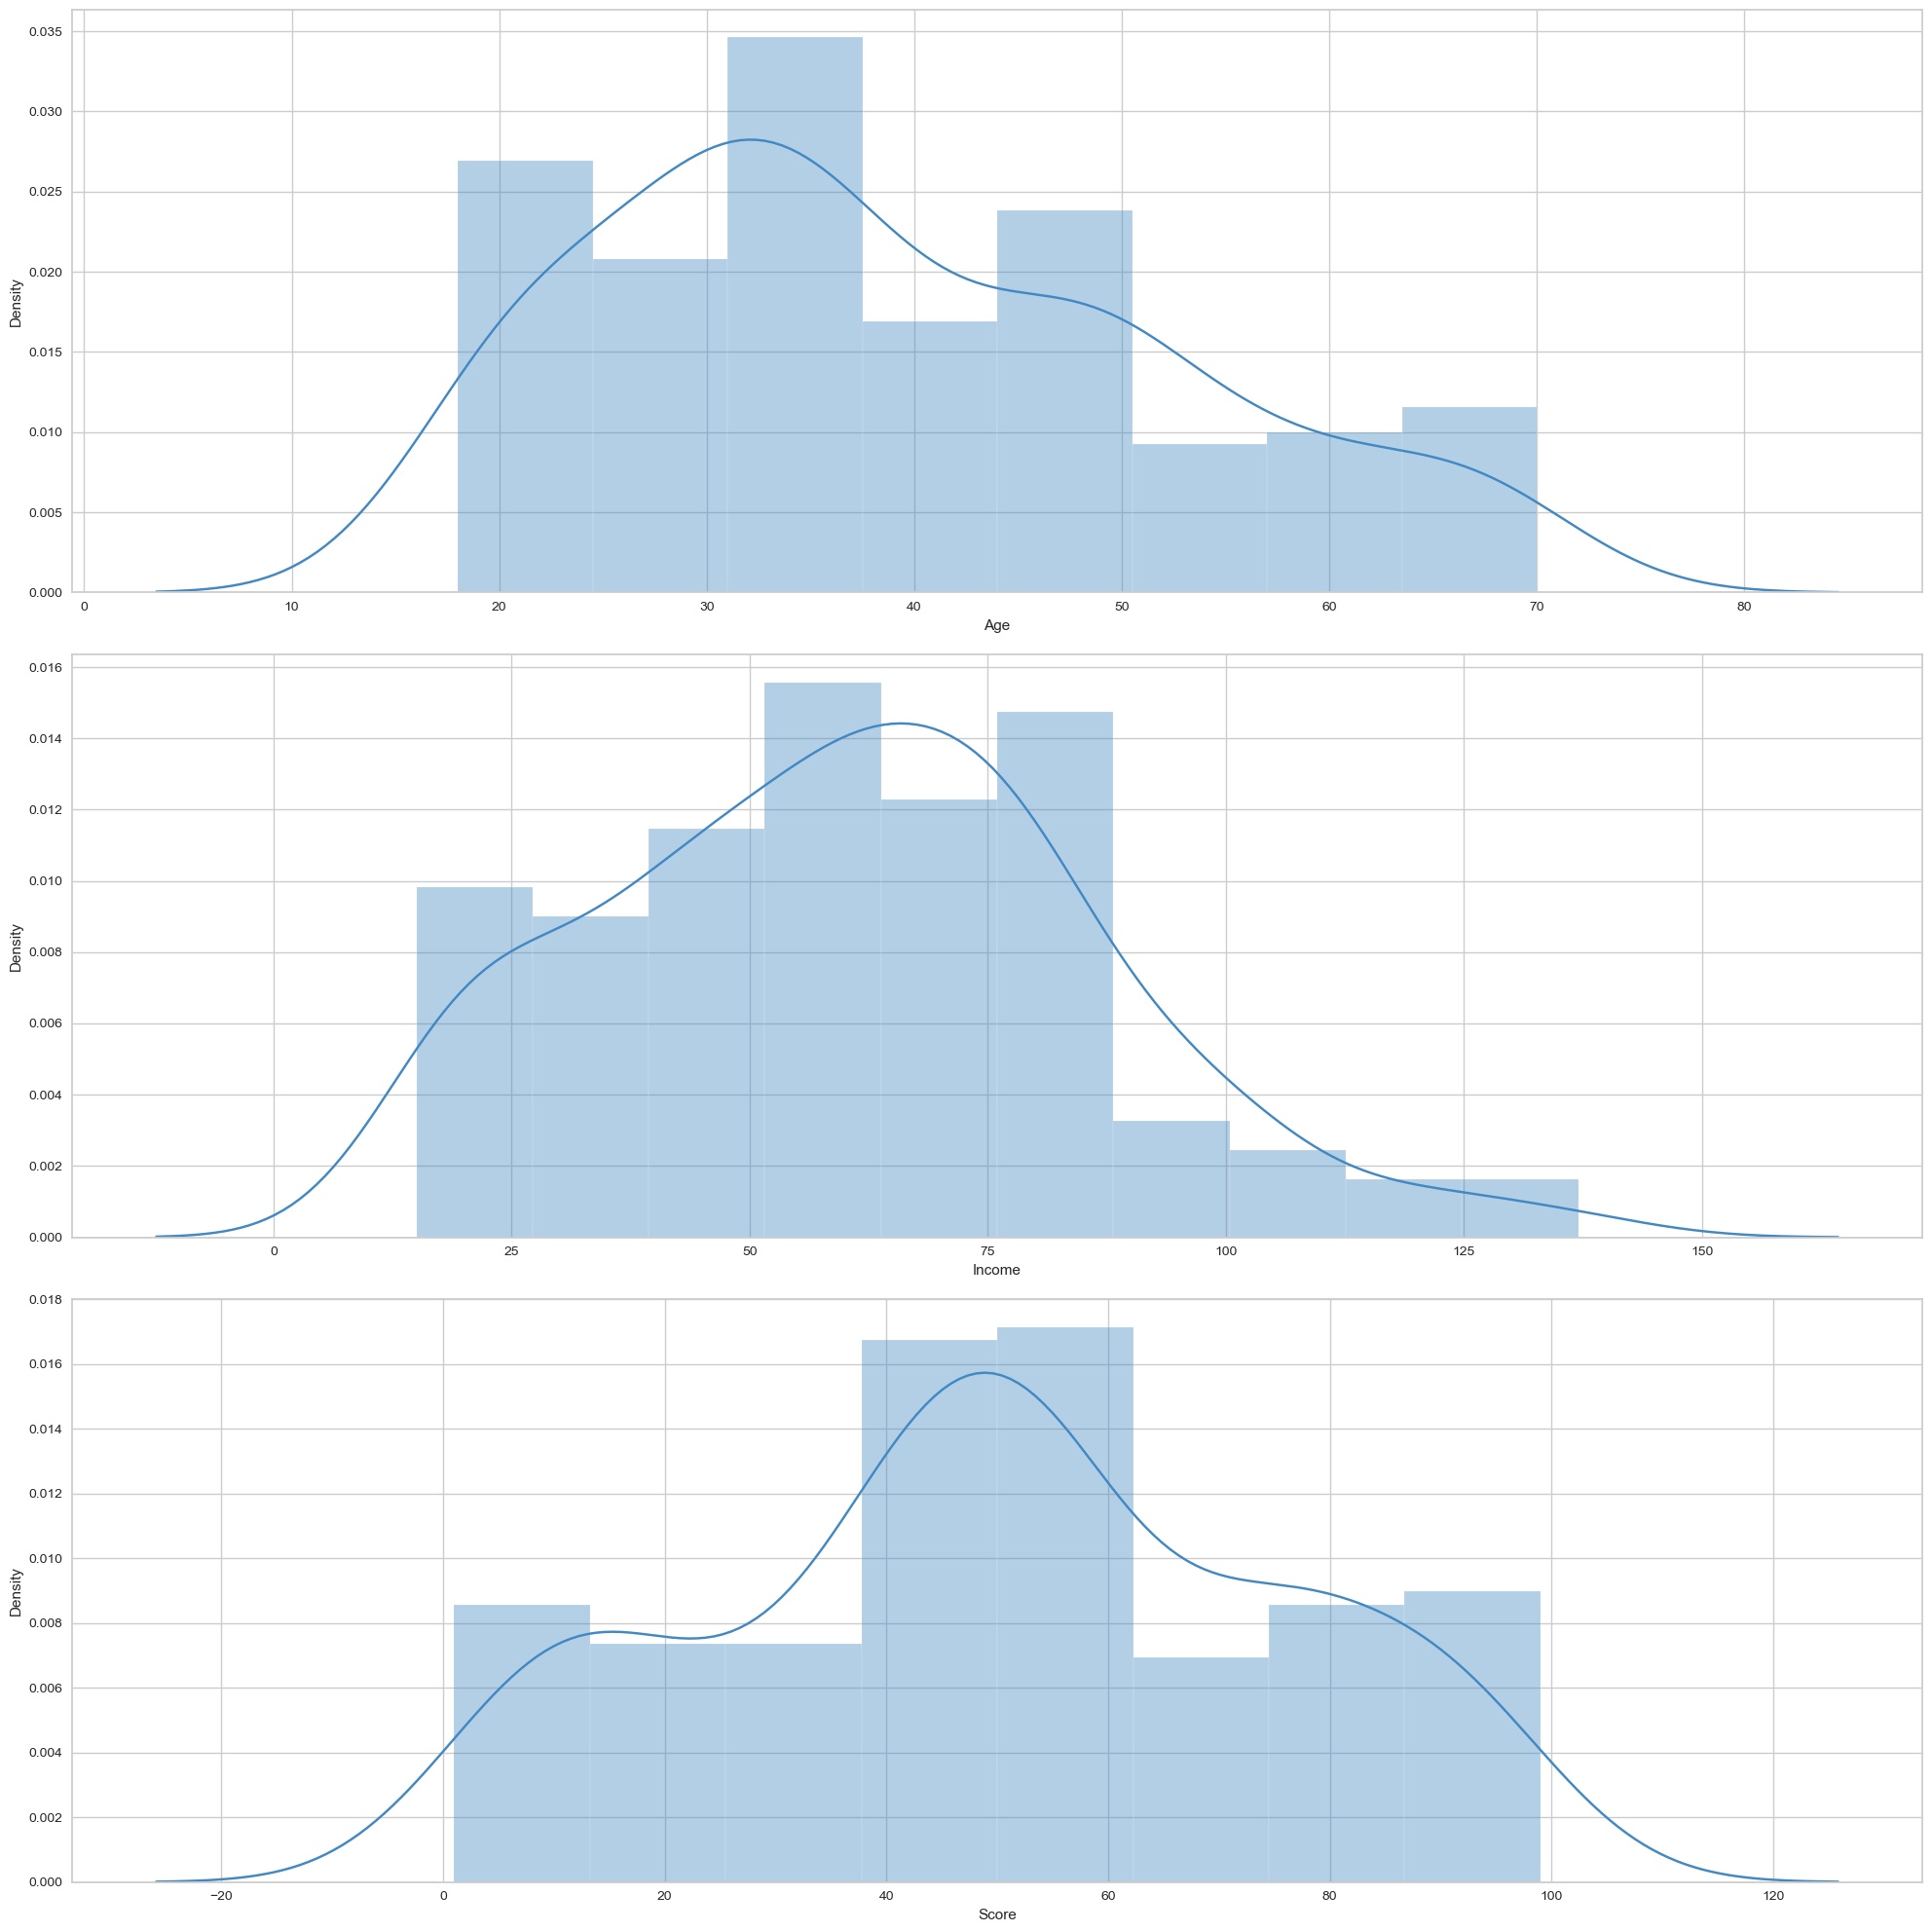

In [93]:
plt.figure(figsize = (20, 20))
column=['Age', 'Income','Score']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

(-1.25, 1.25, -1.25, 1.25)

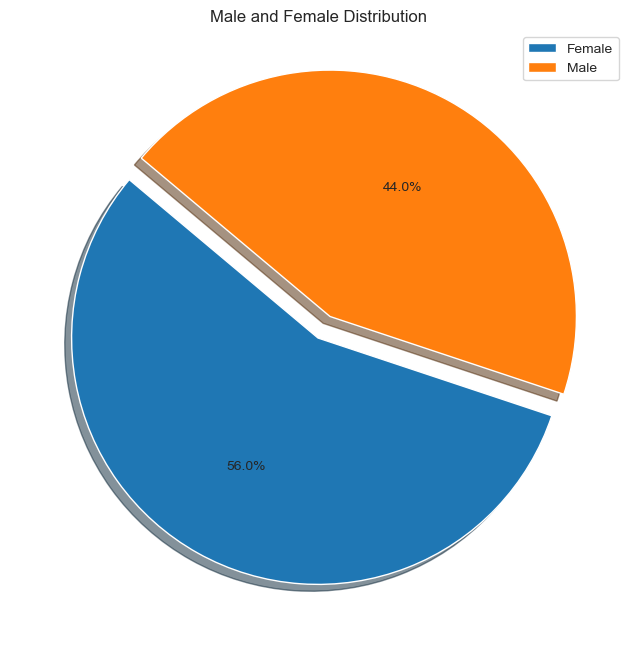

In [13]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')


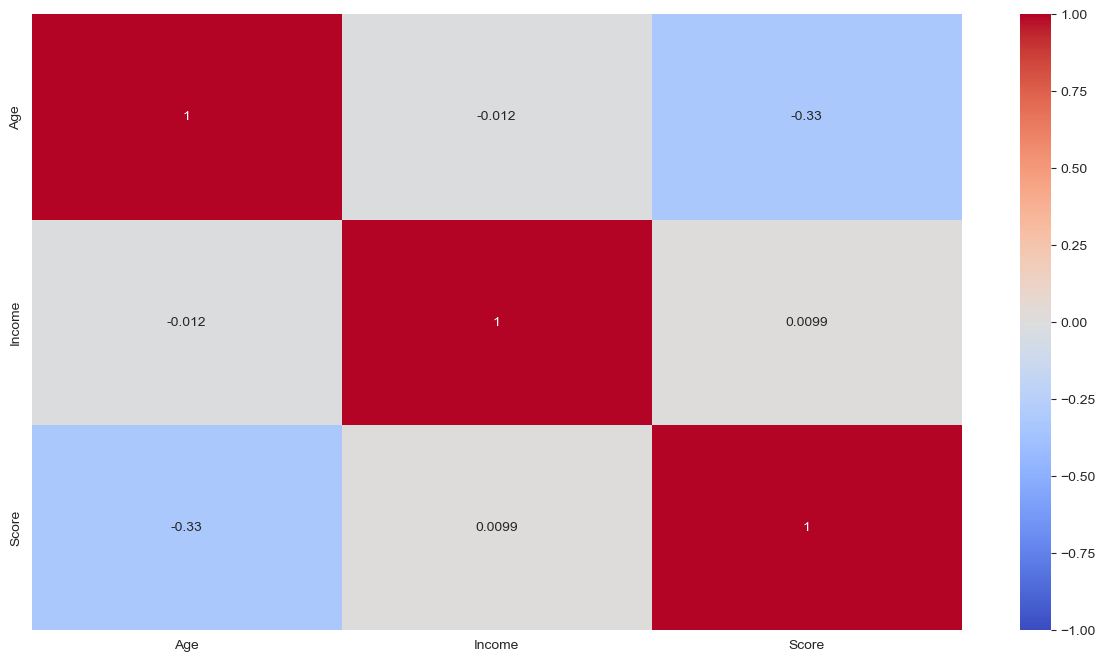

In [14]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

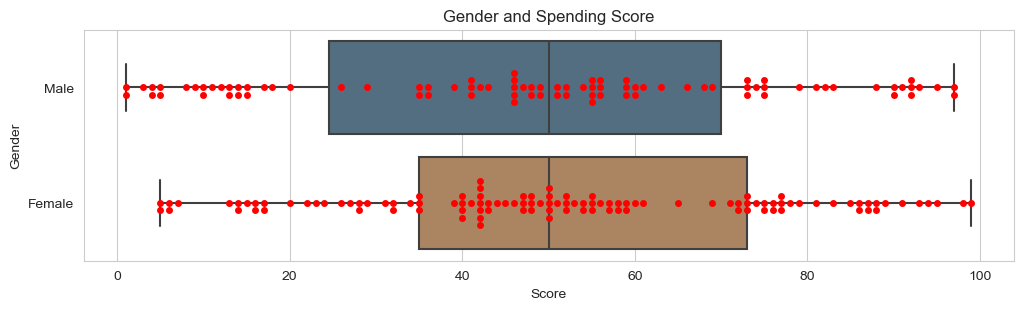

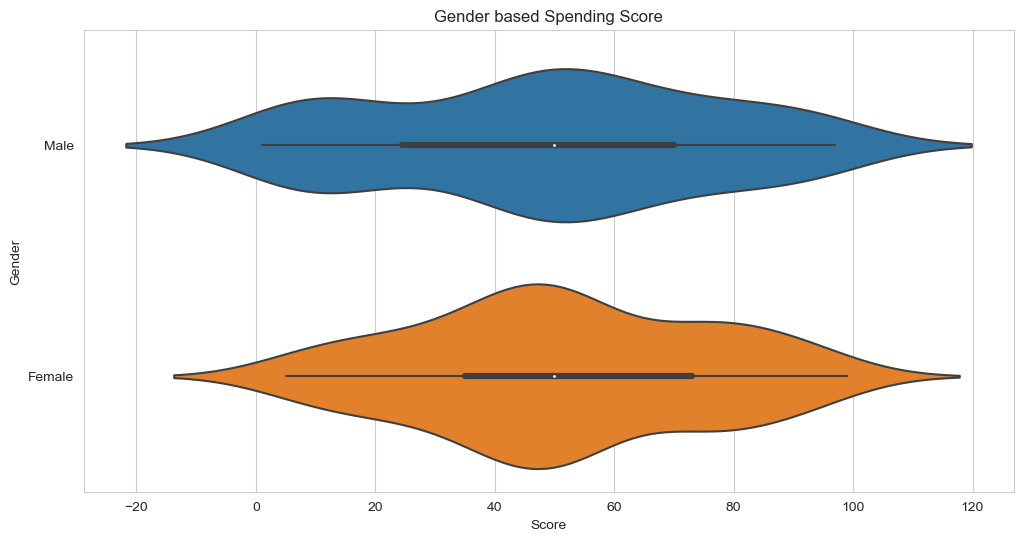

In [15]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='Score', y='Gender', data=df, color="r")
sns.boxplot(x='Score', y='Gender', data=df, saturation=.3)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Score', y='Gender', data=df)
plt.title('Gender based Spending Score')
plt.show()

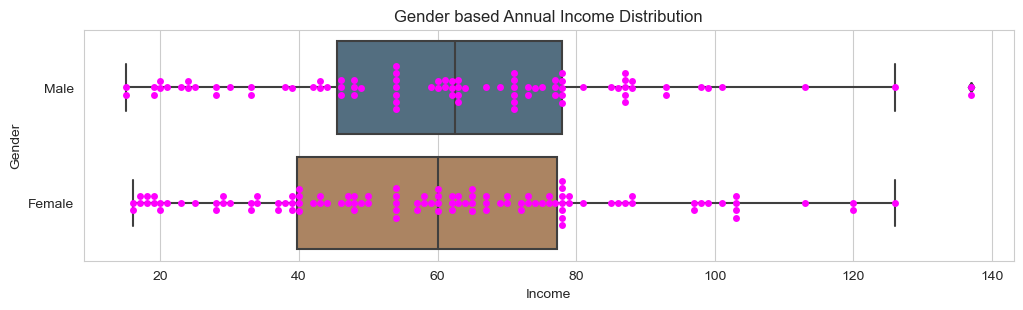

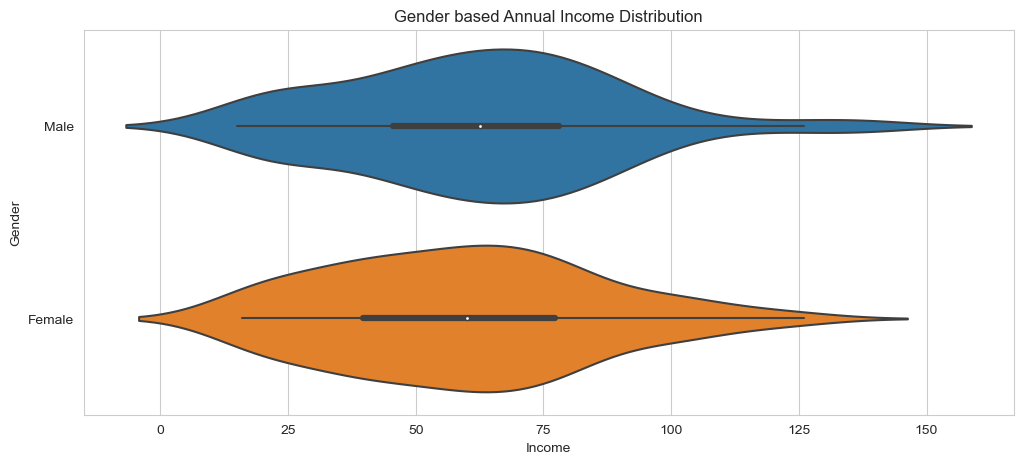

In [16]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='Income', y='Gender', data=df, color="magenta")
sns.boxplot(x='Income', y='Gender', data=df, saturation=0.3)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(12, 5))
sns.violinplot(x='Income', y='Gender', data=df, orient="h")
plt.title('Gender based Annual Income Distribution')
plt.show()

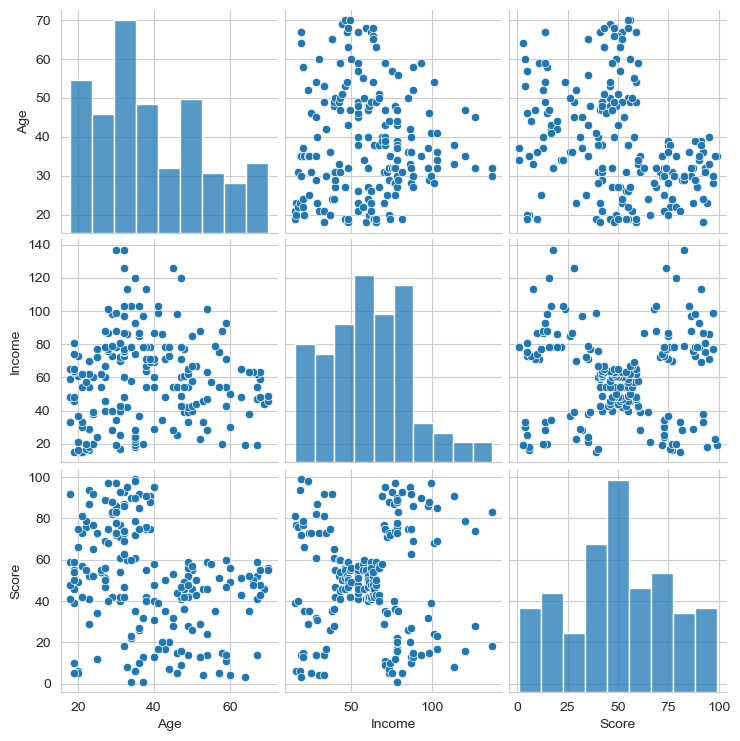

In [17]:
sns.pairplot(df);


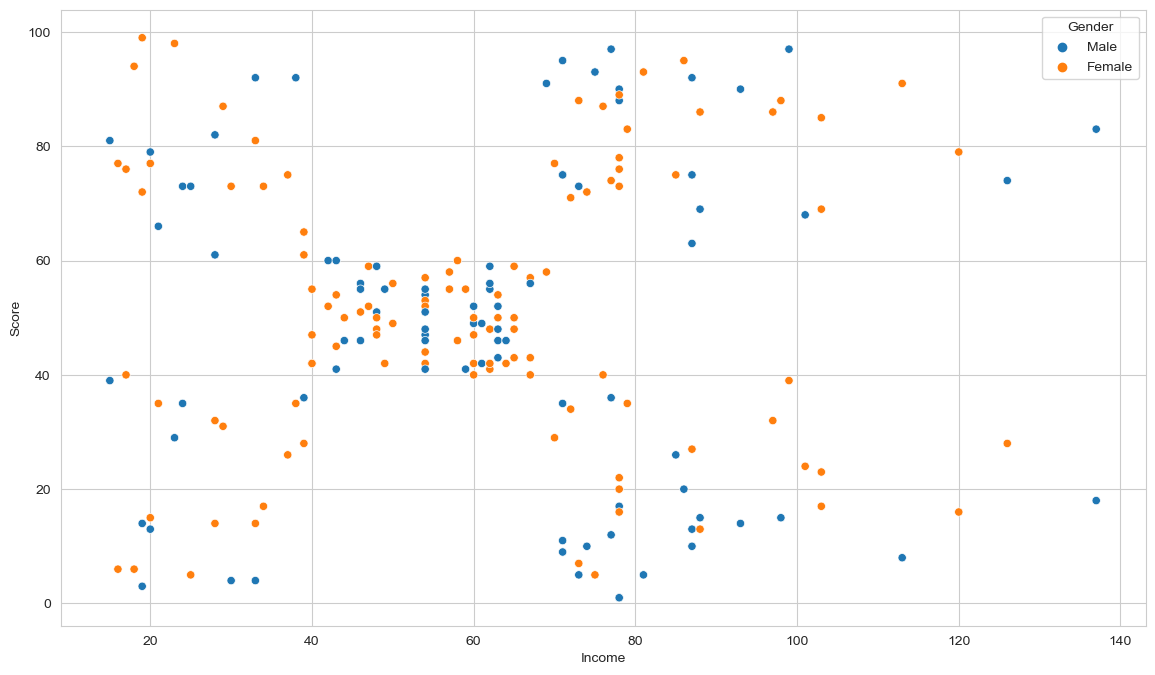

In [18]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Income', y='Score', data=df, hue="Gender")
plt.show()


---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [19]:
df_cl = df.drop(columns="Gender")
df_cl
# We do not use categorical features in k-means algorithms.

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [20]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [21]:
hopkins(df_cl, 1)


0.6932990430231416

# we will contnue clusting becuse the result is 0.6932990430231416

In [22]:
X_agecl = df.loc[:,['Age','Score']]
X_agecl

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

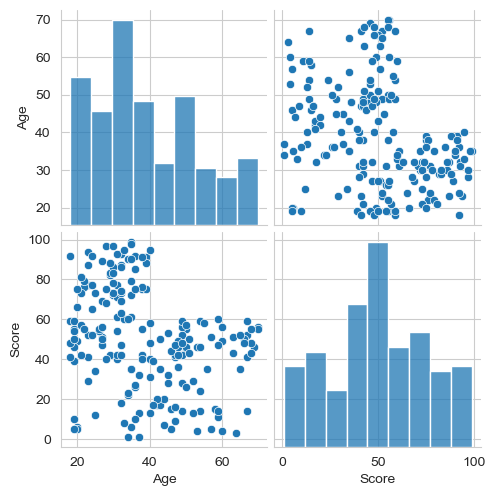

In [24]:
sns.pairplot(X_agecl);
# We look at the distributions of age and spending score.

### inertia

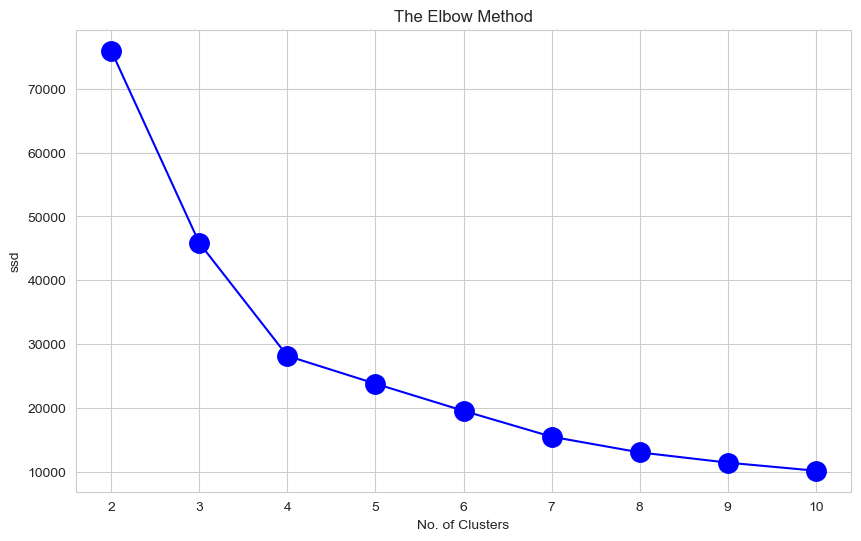

In [25]:
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_agecl)
    ssd.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()


### distortion

Text(0.5, 1.0, 'elbow method')

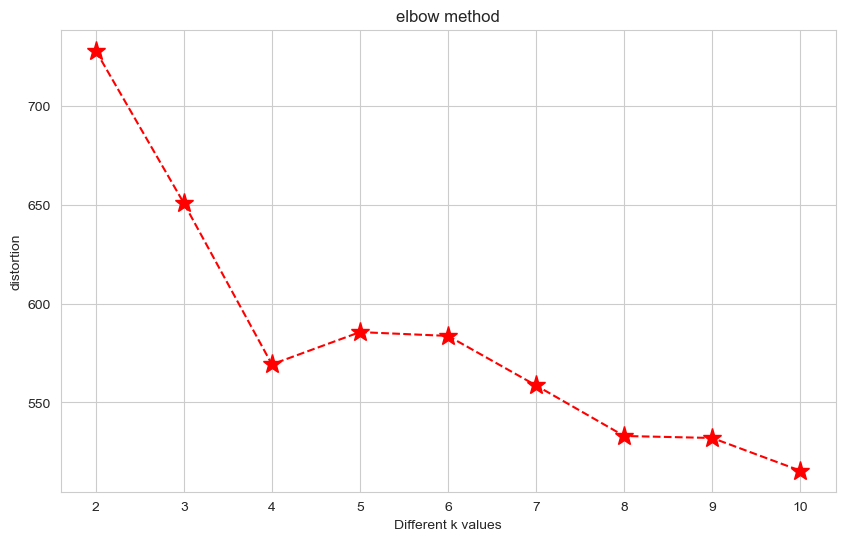

In [26]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_agecl)
    distances = kmeanModel.transform(X_agecl) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### silhoutte_score

In [27]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_agecl)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_agecl, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843
For n_clusters=10, the silhouette score is 0.40744304730373593


### silhoutte score of each cluster

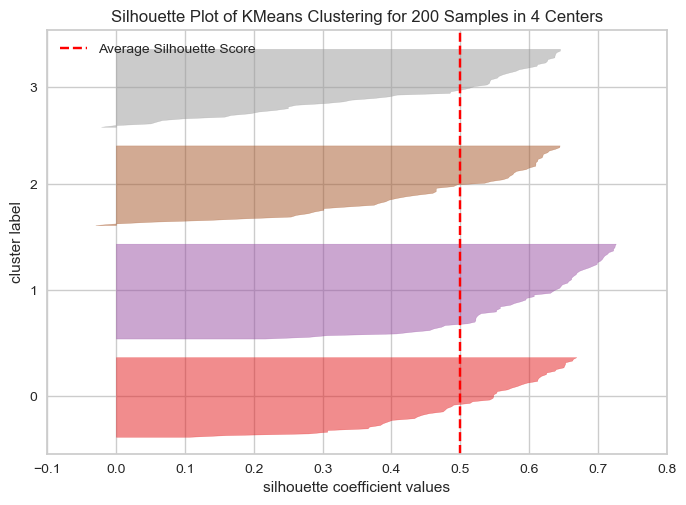

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_agecl)  # Fit the data to the visualizer
visualizer.poof()

In [29]:
model3.n_clusters


4

In [30]:
#model3.n_clusters

for i in range(model3.n_clusters):
    label = (model3.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.5960779476836082
mean silhouette score for label 2    : 0.45429047261675404
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### *iii. Apply K Means*

In [31]:
kme = KMeans(n_clusters=4, random_state=42)


In [32]:
kme.fit_predict(X_agecl)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [33]:
df_age_cl = X_agecl.copy()
df_age_cl


,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [34]:
df_age_cl["cluster_Kmeans"] = kme.fit_predict(X_agecl) 



In [35]:
df_age_cl

,Age,Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


#### *iv. Visualizing and Labeling All the Clusters*

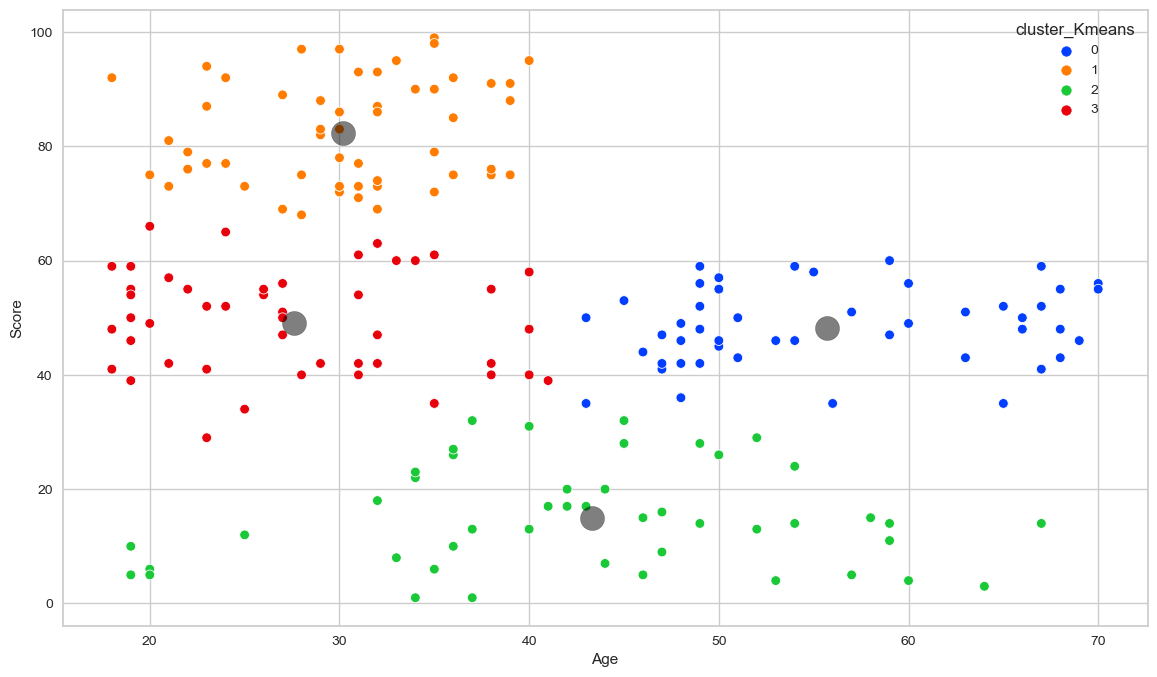

In [36]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Score',
                hue='cluster_Kmeans',
                data=df_age_cl,
                palette="bright")
centers = kme.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
# We look at clusters and centroids formed by age and spending score.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [37]:
X_ai_ss = df[['Income','Score']]
X_ai_ss.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [38]:
hopkins(X_ai_ss, 1)

0.7173876497718775

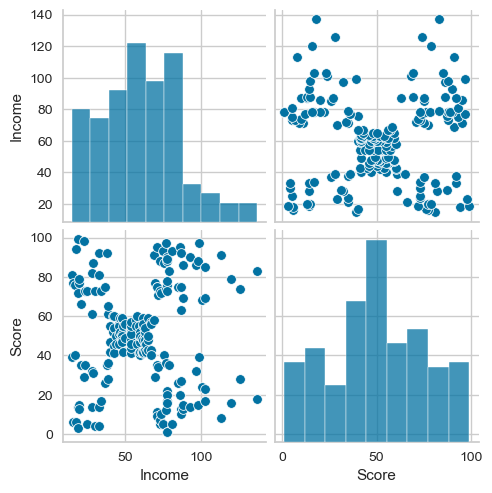

In [39]:
sns.pairplot(X_ai_ss)
# We look at the distributions of Annual_Income and Spending_Score.

### inertia

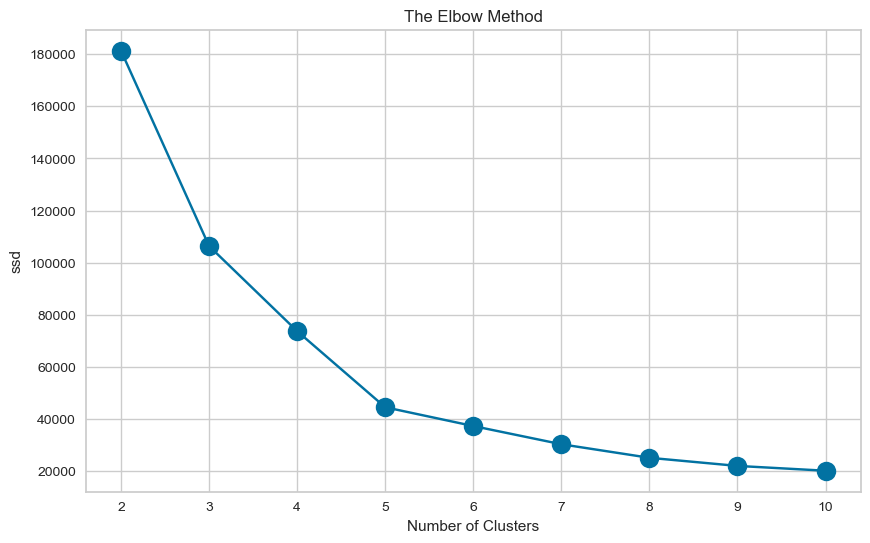

In [40]:
ssd =[]
for n in range(2,11):
    kme=KMeans(n_clusters=n, random_state=42)
    kme.fit(X_ai_ss)
    ssd.append(kme.inertia_) # distances from each observation to each cluster centroid
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-", markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

### distortion

Text(0.5, 1.0, 'elbow method')

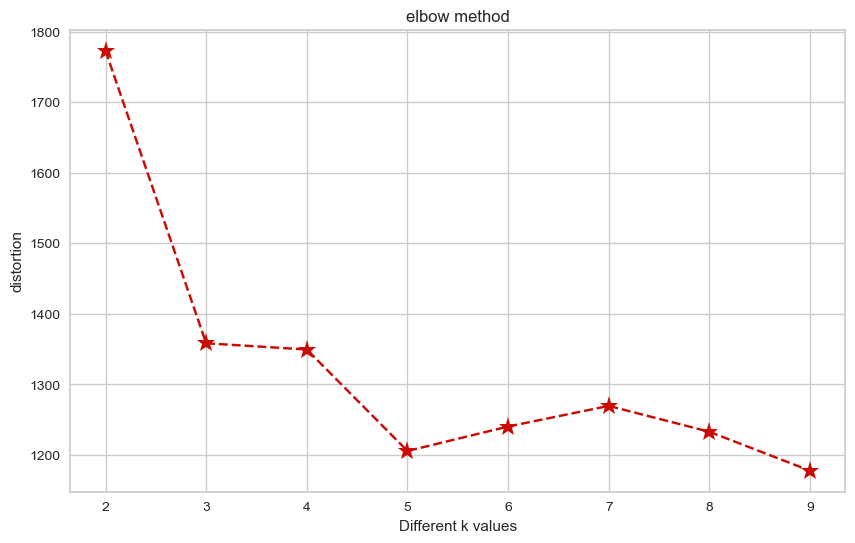

In [41]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_ai_ss)
    distances = kmeanModel.transform(X_ai_ss) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### silhouette_score

In [42]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:

    kme = KMeans(n_clusters=num_clusters, random_state=42)
    kme.fit(X_ai_ss)
    cluster_labels = kme.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367
For n_clusters=10, the silhouette score is 0.4410568674364981


### silhouette_score of each cluster

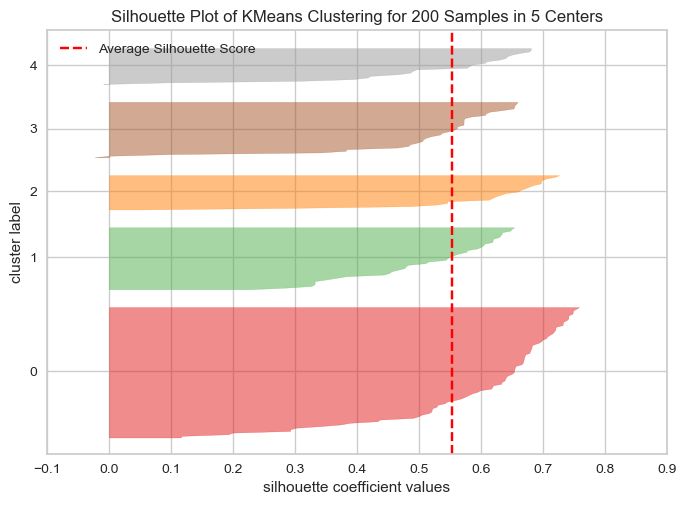

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X_ai_ss)  # Fit the data to the visualizer
visualizer.poof()

In [44]:


for i in range(model4.n_clusters):
    label = (model4.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5091706489322517
mean silhouette score for label 2    : 0.5990128687006722
mean silhouette score for label 3    : 0.5039873487056818
mean silhouette score for label 4    : 0.5122676140736505
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [45]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X_ai_ss)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [46]:
df_ai_ss = X_ai_ss.copy()
df_ai_ss.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [47]:
df_ai_ss['cluster_Kmeans'] = kmeans2.fit_predict(X_ai_ss) #kmeans2.labels_
df_ai_ss

,Income,Score,cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


#### *iv. Visualizing and Labeling All the Clusters*

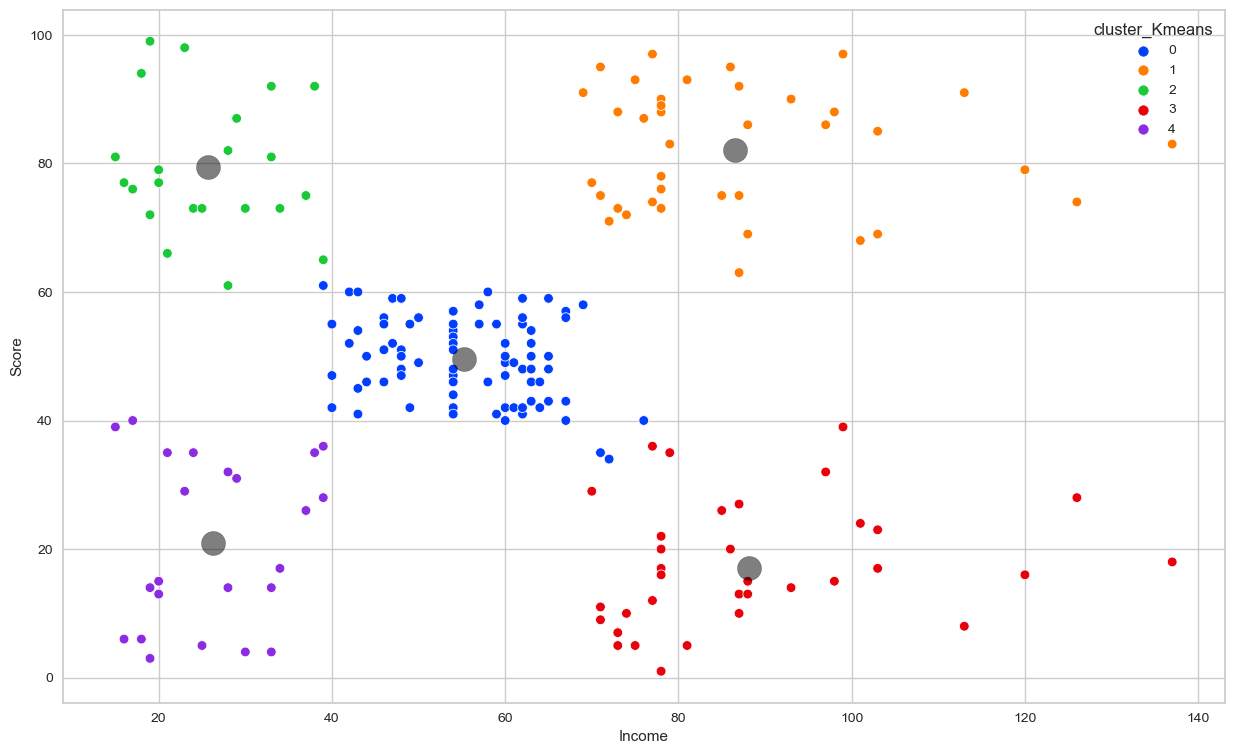

In [48]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Income',
                y='Score',
                hue='cluster_Kmeans',
                data=df_ai_ss,
                palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

# We look at the clusters and centroids formed according to Annual_Income and Spending_Score.

### Hierarchical Clustering

In [49]:
X_agecl

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [50]:
from scipy.cluster.hierarchy import linkage

# In order to draw a dendrogram, it's not enough to give the data directly, we have to use linkage.

In [51]:
from scipy.cluster.hierarchy import dendrogram

### Dendrogram

In [52]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X_agecl, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

* Let's pay attention to the scales.

### silhouette_score

In [53]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_agecl)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_agecl, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## Clustering based on Annual Income and Spending Score

In [54]:
X_ai_ss

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Dendrogram

In [55]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X_ai_ss, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

We have determend that we will use 3 clusters using ward method.
Clustering based on Annual Income and Spending Score- x2

### silhouette_score

In [56]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
   
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_ai_ss)
    cluster_labels = Agg_model.labels_
    
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


###  *Apply Agglomerative Clustering*

In [57]:
X_agecl

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [58]:
Agg1 = AgglomerativeClustering(n_clusters=4,affinity="euclidean", linkage="ward")  #older sklearn

#Agg1 = AgglomerativeClustering(n_clusters=4,metric="euclidean", linkage="ward")  #newer sklearn
                               # If linkage = "ward" then metric='euclidean' is required.
# originating from the formulation of variance...

y_agg = Agg1.fit_predict(X_agecl)

In [59]:
df_age_cl

,Age,Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


In [60]:
df_age_cl['cluster_Agg'] = y_agg
df_age_cl.head()

,Age,Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


#### Annual Income and Spending Score

In [61]:
X_ai_ss

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [62]:
#Agg2 = AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward') #newer sklearn

Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') #older sklearn
y_agg2 = Agg2.fit_predict(X_ai_ss)

In [63]:
df_ai_ss

,Income,Score,cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [64]:
df_ai_ss['cluster_Agg'] = y_agg2
df_ai_ss.head()

,Income,Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


### *Visualizing and Labeling All the Clusters*

#### Age and Spending Score

In [65]:
df_age_cl

,Age,Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,2,0
197,32,74,1,3
198,32,18,2,2


<Axes: xlabel='Age', ylabel='Score'>

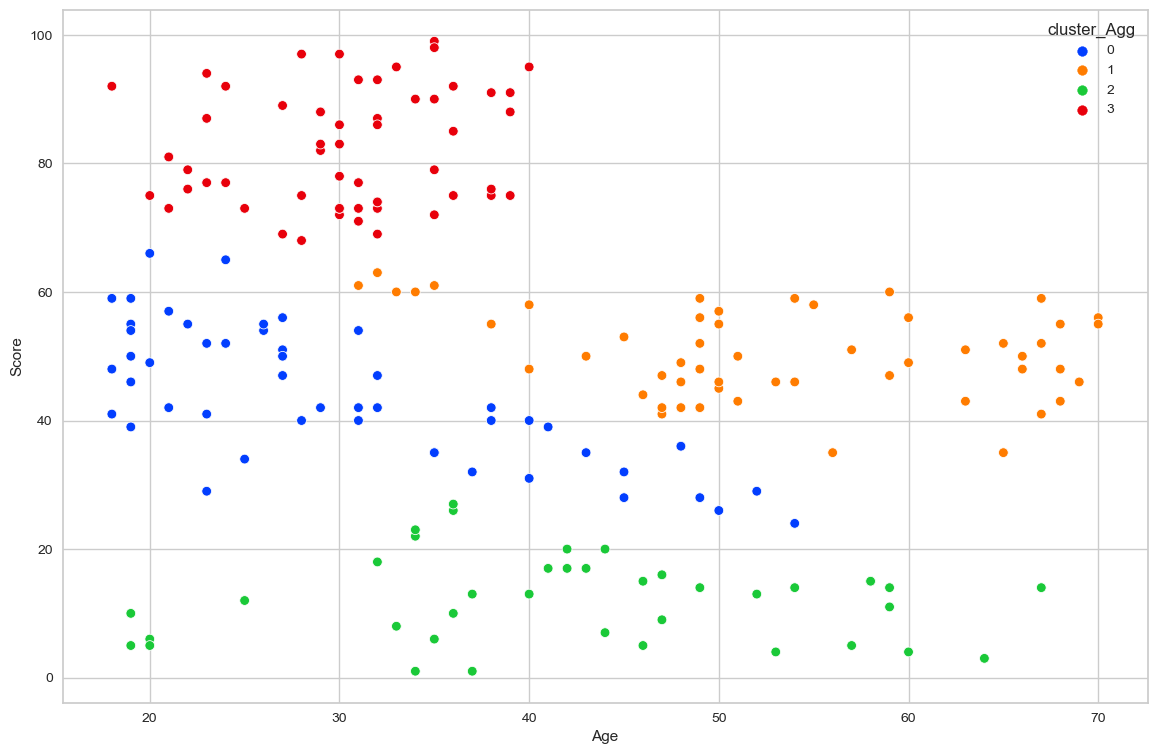

In [66]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Score',
                hue='cluster_Agg',
                data=df_age_cl,
                palette="bright")

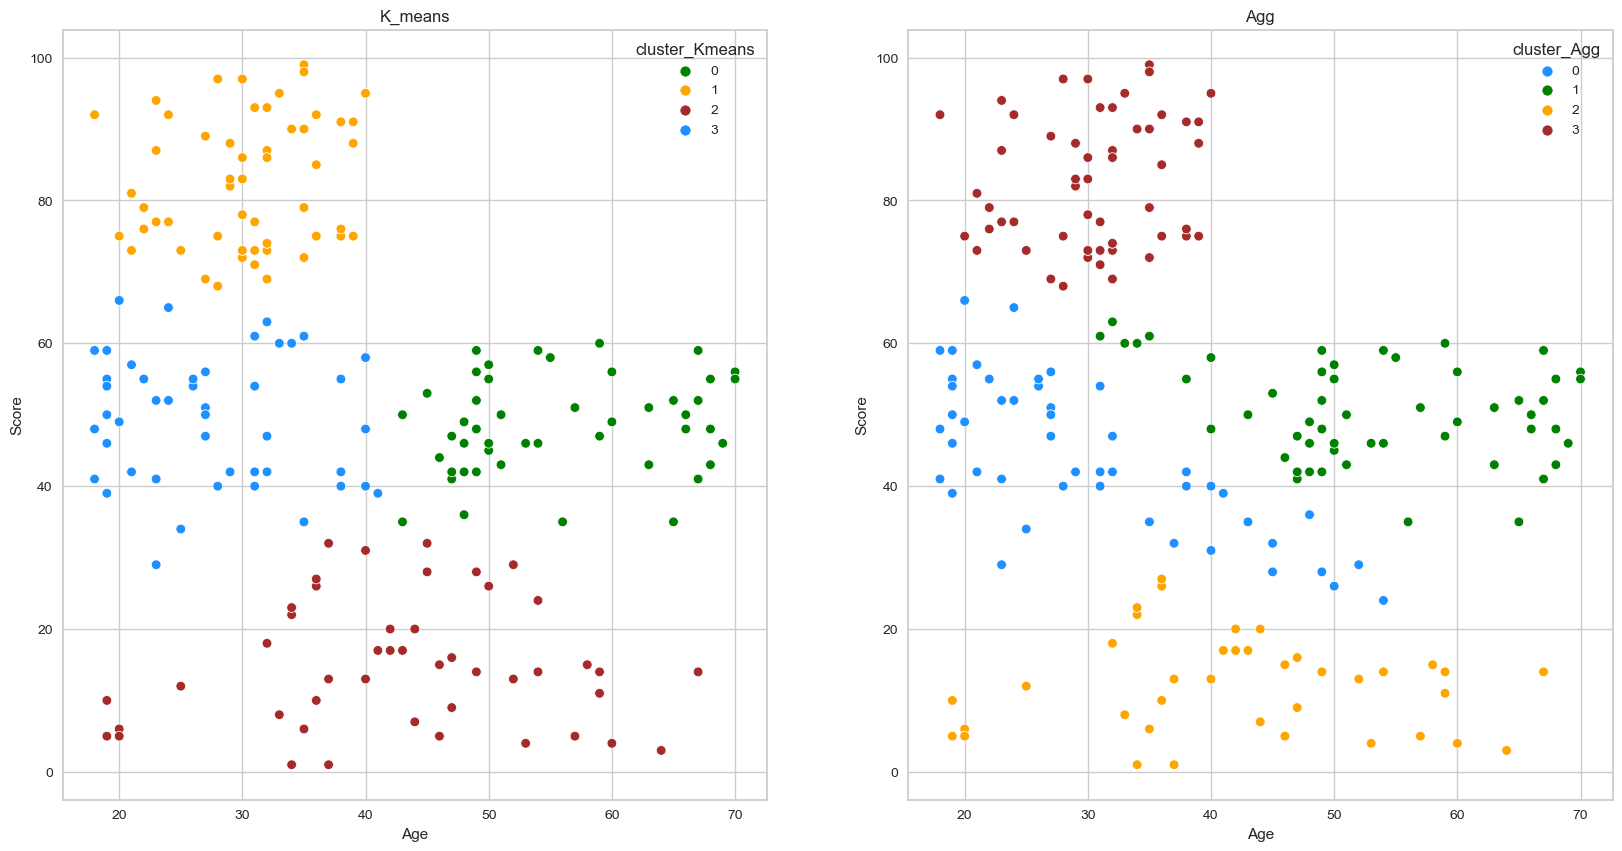

In [67]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Score',
                hue='cluster_Kmeans',
                data=df_age_cl,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Score',
                hue='cluster_Agg',
                data=df_age_cl,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

In [68]:
df_ai_ss

,Income,Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


<Axes: xlabel='Income', ylabel='Score'>

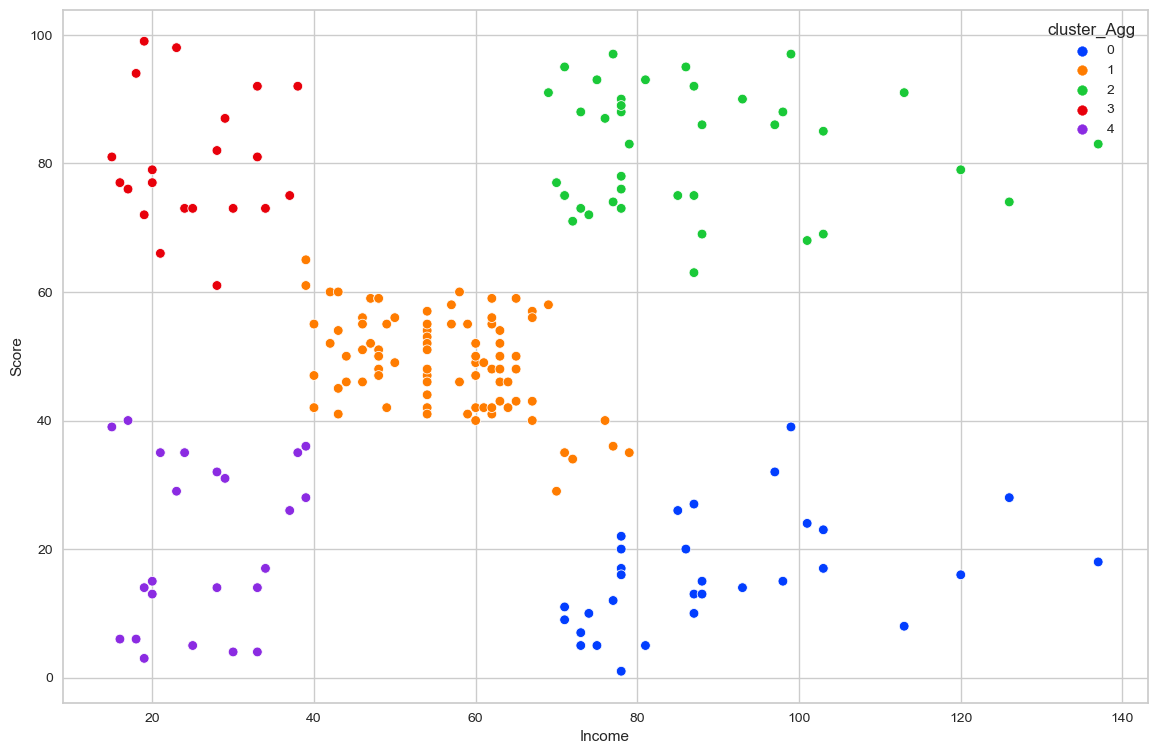

In [69]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Income',
                y='Score',
                hue='cluster_Agg',
                data=df_ai_ss ,
                palette="bright")

Text(0.5, 1.0, 'Agg')

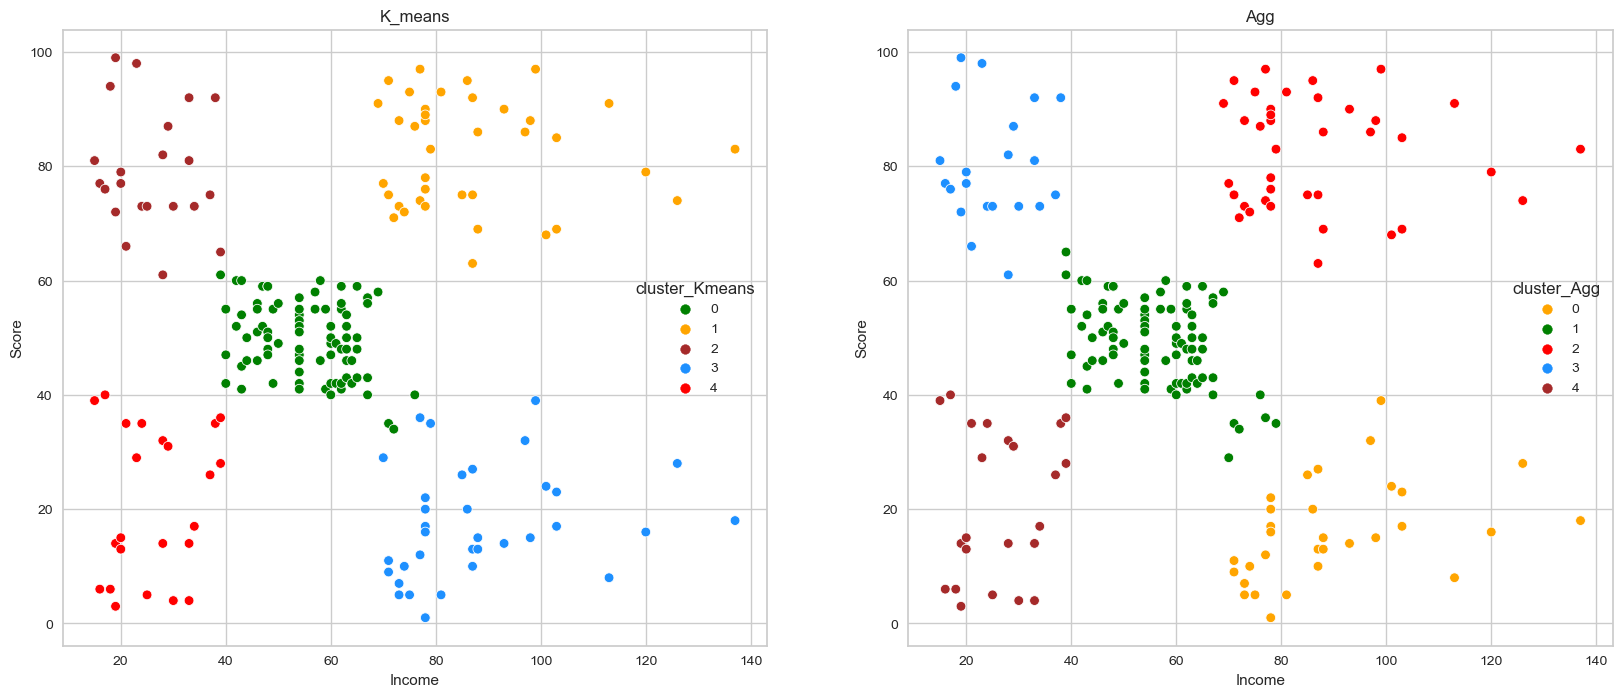

In [70]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Income',
                y='Score',
                hue='cluster_Kmeans',
                data=df_ai_ss,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Income',
                y='Score',
                hue='cluster_Agg',
                data=df_ai_ss,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score

In [71]:
df_age_cl

,Age,Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,2,0
197,32,74,1,3
198,32,18,2,2


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

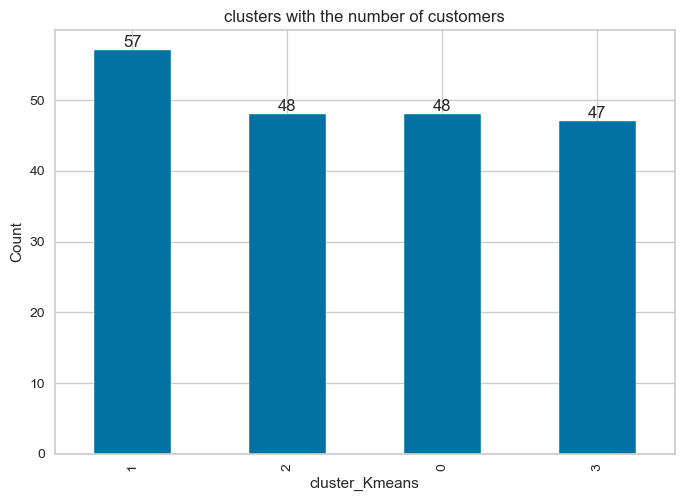

In [72]:

plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age_cl.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [73]:
df["cluster_Age_Spending_Score"] = df_age_cl.cluster_Kmeans
df.head()



,Gender,Age,Income,Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


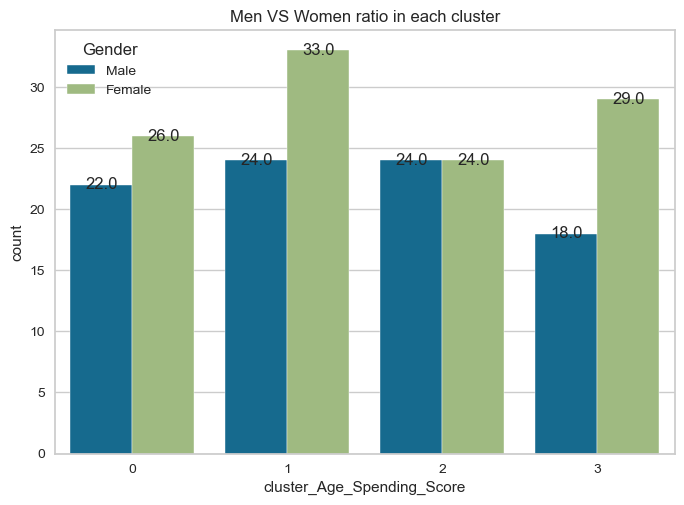

In [74]:
mapping = {"Female": 0, "Male": 1}

# Clean the column
df["cluster_Age_Spending_Score"] = df["cluster_Age_Spending_Score"].replace(mapping)
df["cluster_Age_Spending_Score"] = pd.to_numeric(df["cluster_Age_Spending_Score"])

# Create the countplot
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()
#plt.title("Men VS Women ratio in each cluster")
#plt.ylabel("Count")
#ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
#for p in ax.containers:
 #   ax.bar_label(p)


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Score'>

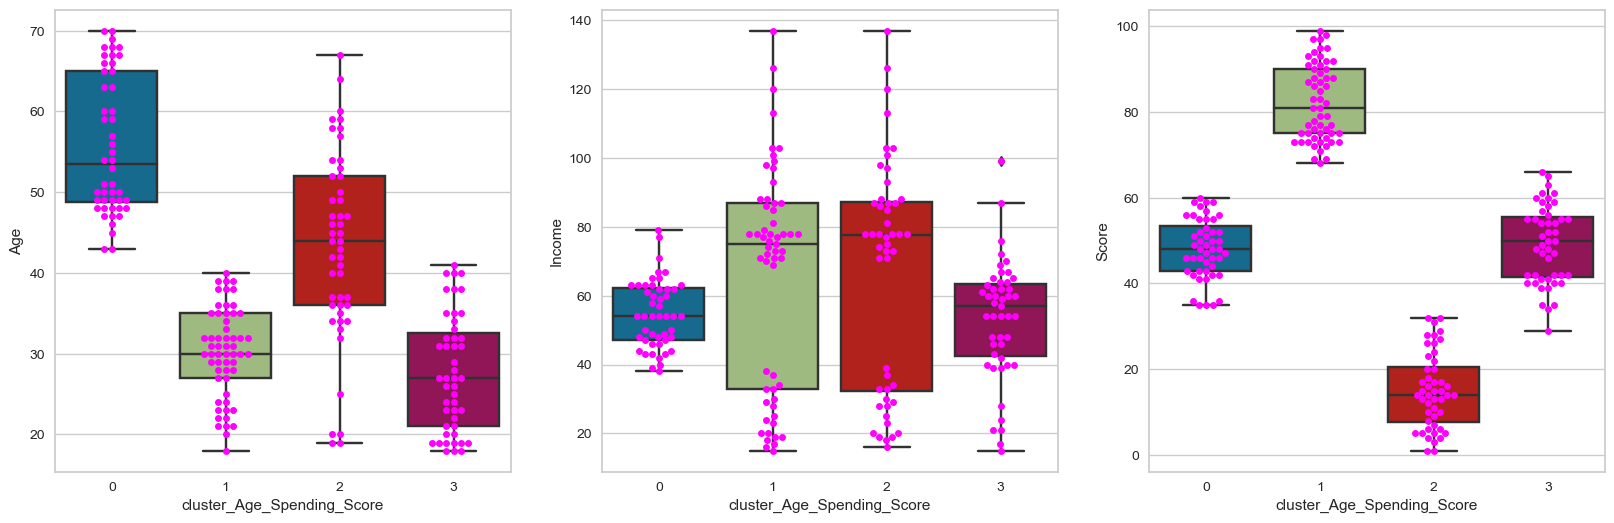

In [76]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Income", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Income",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Score", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Score",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score

In [78]:
df_ai_ss

,Income,Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


In [79]:
df_ai_ss.cluster_Kmeans.value_counts()

cluster_Kmeans
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

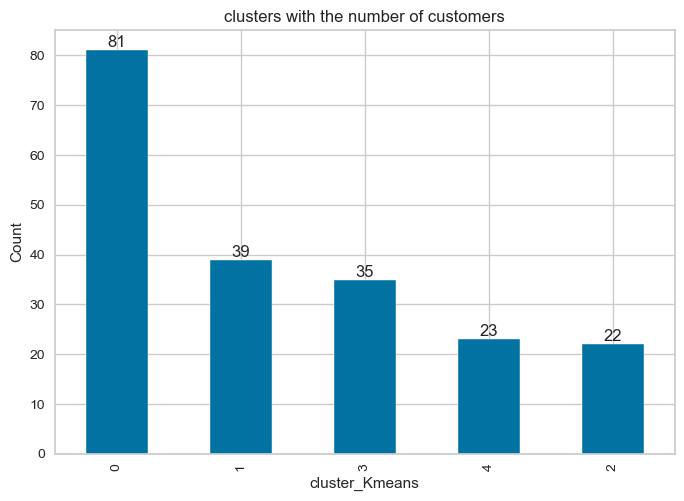

In [80]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_ai_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [81]:
df.head()

,Gender,Age,Income,Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


In [82]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

# According to Annual_Income and Spending_Score,
# we drop the cluster_Age_Spending_Score to get results according to the clusters we created with Kmeans.

In [83]:
df["cluster_Annual_Income_Spending_Score"] = df_ai_ss.cluster_Kmeans
df.head()
# Add cluster_Annual_Income_Spending_Score column.

,Gender,Age,Income,Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


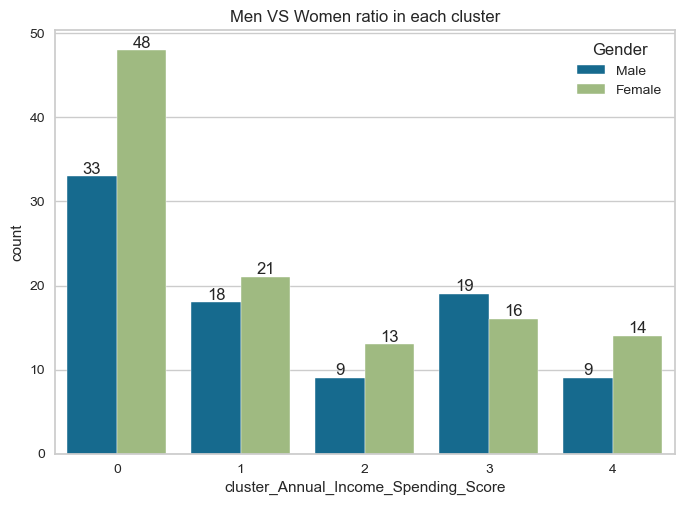

In [84]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [85]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# here we group df by both Gender and cluster_Annual_Income_Spending_Score.

Age     Income      Score
Gender cluster_Annual_Income_Spending_Score                                 
Female 0                                     40.895833  55.354167  49.000000
       1                                     32.190476  86.047619  81.666667
       2                                     25.461538  25.692308  80.538462
       3                                     43.250000  90.937500  22.062500
       4                                     43.214286  27.357143  21.714286
Male   0                                     45.363636  55.212121  50.272727
       1                                     33.277778  87.111111  82.666667
       2                                     25.000000  25.777778  77.666667
       3                                     39.315789  85.894737  12.947368
       4                                     48.333333  24.666667  19.666667

<Axes: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Score'>

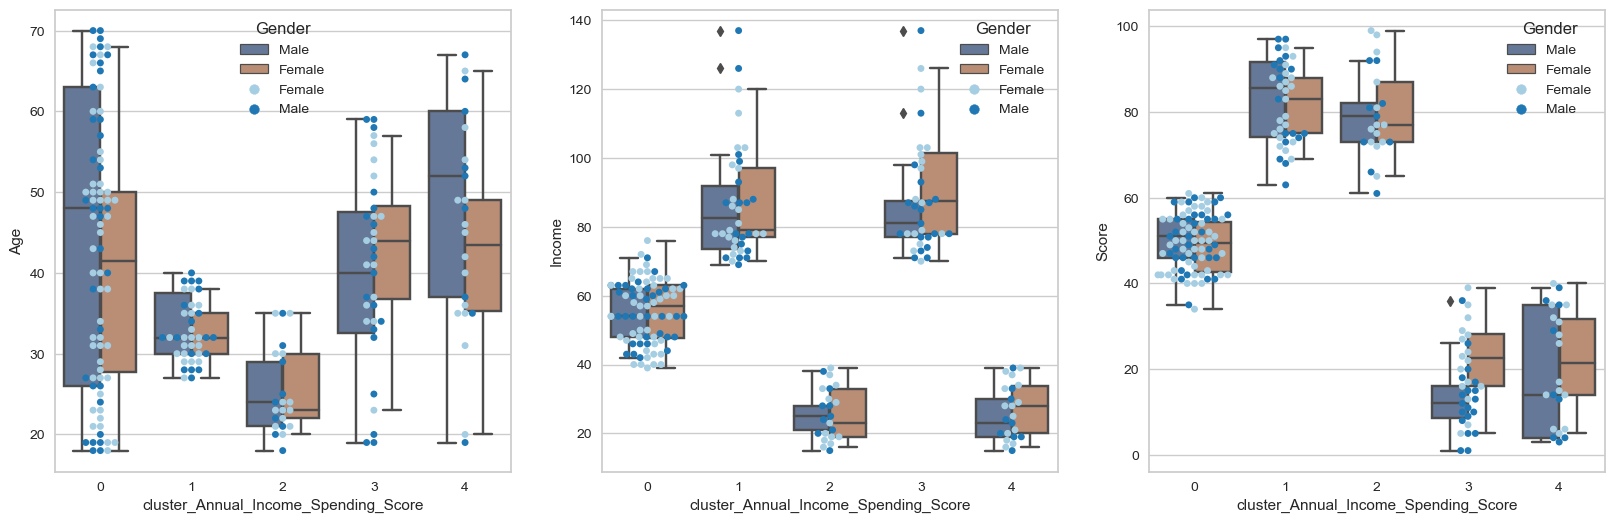

In [88]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Income", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Income", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Score", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Score", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

Cluster 0 represents customers with average age, income, and spending. To encourage more spending from this group, further research is needed to identify effective strategies.

Cluster 1 consists of customers with high income but low spending. They are a target audience that requires special strategies to increase their spending habits.

Cluster 2 comprises customers with low income and spending. This group can be directed towards shopping with gift certificates or other incentives to boost their spending.

Cluster 3 includes customers with low income but high spending. Despite their frequent shopping, they do not contribute significantly to the company's profitability.

Cluster 4 represents loyal customers with high income and spending. Special promotions and personalized offers can help retain and maximize profits from this valuable segment.

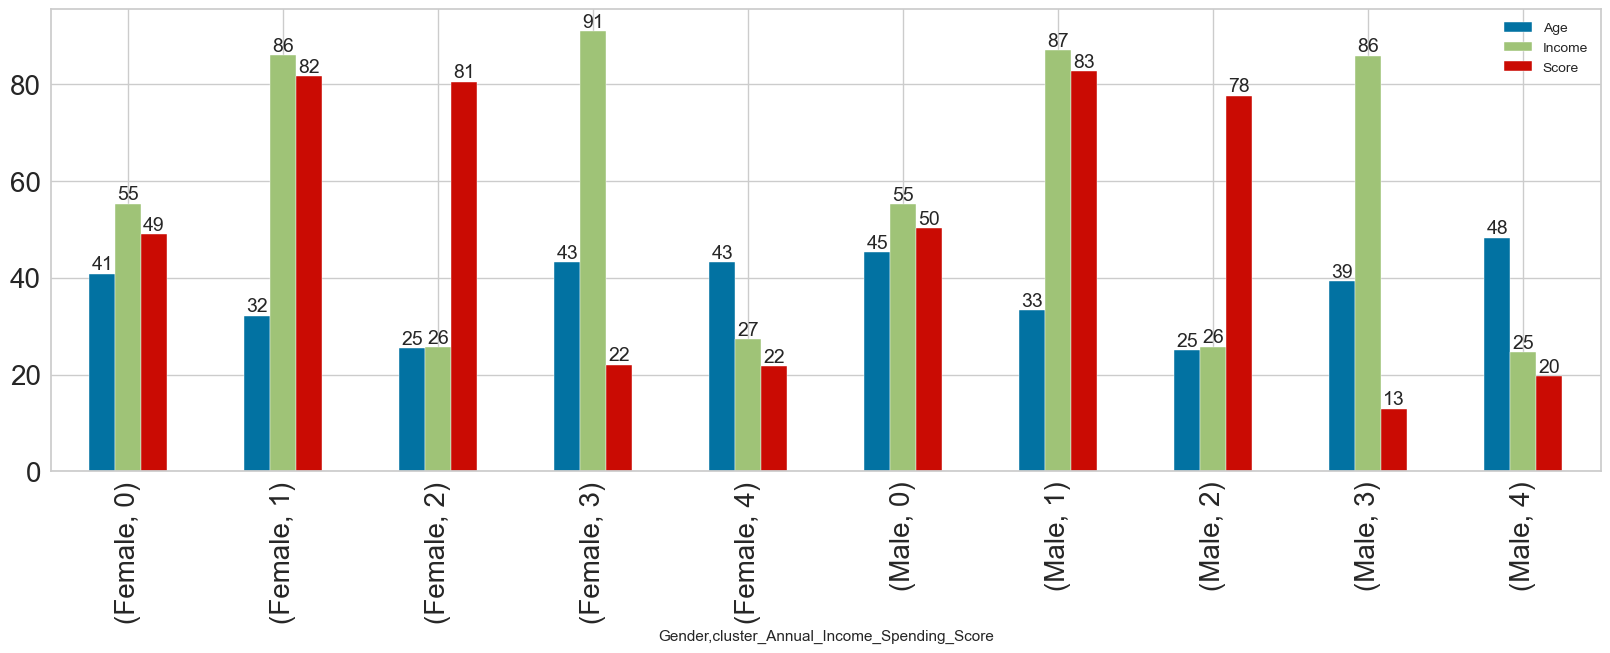

In [89]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion


##Cluster Analysis:

Cluster 0: The customers in this cluster have average age and moderate annual income and spending scores. Further research is needed to encourage more spending from this group.

Cluster 1: This cluster represents customers with high annual income but low spending scores. They are a target audience that requires special strategies to increase their spending.

Cluster 2: Customers in this cluster have low annual income and spending scores. They can be directed towards shopping with gift certificates or other incentives.

Cluster 3: This cluster consists of younger customers with low annual income but very high spending scores. Although they engage in frequent shopping, they do not contribute significantly to the company's profits.

Cluster 4: These customers have moderate age, high annual income, and high spending scores. They are loyal customers who generate substantial profits for the company. Special promotions and personalized offers can help retain and further engage this valuable segment.

###MALE 
Cluster 0: Average age, average income and spending. Further research needed for increased spending.
Cluster 1: High income but low spending. Target audience requiring special strategies.
Cluster 2: Low income and spending. Can be directed towards gift certificates.
Cluster 3: Low income but high spending. Low-profit group despite frequent shopping.
Cluster 4: High income and spending. Loyal customers generating substantial profits. Special promotions recommended.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___